## DF + LIB

In [18]:
%store -r merge_unique_df

In [19]:
# essential
import pandas as pd
import matplotlib.pyplot as plt

# for NN
import keras
from keras.models import Sequential
# we most use sequential model -> one layer after the other (sequence of layer)
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import MeanAbsolutePercentageError
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

# non so se siano utili
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#basics 
# essential
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CREATION DUMMIES VARIABLES

In [20]:
# in order to obtain the True/False for each genre
onehot_enc=pd.get_dummies(merge_unique_df['maingenere'],prefix='genre')
onehot_enc.head(2)

,genre_blues,genre_country,genre_dance,genre_disco,genre_folk,genre_funk,genre_house,genre_indie,genre_jazz,genre_latin,genre_metal,genre_other,genre_pop,genre_r&b,genre_rap,genre_rock,genre_soul
SongID,,,,,,,,,,,,,,,,,
-twistin'-White Silver SandsBill Black's Combo,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
¿Dònde Està Santa Claus? (Where Is Santa Claus?)Augie Rios,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [21]:
# Conversione in valori binari (0 o 1) per rappresentare il main genere con 1 e gli altri con 0
one_hot_enc_binary = onehot_enc.applymap(lambda x: 1 if x else 0)

C:\Users\lovoa\AppData\Local\Temp\ipykernel_9168\823651478.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  one_hot_enc_binary = onehot_enc.applymap(lambda x: 1 if x else 0)


In [22]:
# we merge the 2 df
df_one_hot=pd.concat([merge_unique_df,one_hot_enc_binary],axis=1)
df_one_hot.head(2)

,Performer,Song,spotify_genre,spotify_track_duration_minute,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,...,genre_indie,genre_jazz,genre_latin,genre_metal,genre_other,genre_pop,genre_r&b,genre_rap,genre_rock,genre_soul
SongID,,,,,,,,,,,,,,,,,,,,,
-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],3.43,unknown,single,0.59,0.57,5.37,-9.97,...,0,0,0,0,1,0,0,0,0,0
¿Dònde Està Santa Claus? (Where Is Santa Claus?)Augie Rios,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],3.43,unknown,single,0.59,0.57,5.37,-9.97,...,0,0,0,0,1,0,0,0,0,0


# GENERALIZE ONE HOT - ENCODING - all users

In [23]:
numerical_features = [
    'spotify_track_duration_minute', 'danceability', 'energy', 'loudness',
    'mode', 'speechiness', 'acousticness',
    'spotify_track_popularity', 'instrumentalness', 'liveness']

genre_features = [col for col in df_one_hot.columns if col.startswith('genre_')]

# UNION OF THE TWO 
total_features = numerical_features + genre_features

target='valence'

## PLOTS

In [24]:
def plot_for_model(history):

    #plot loss
    plt.figure()
    plt.plot(history.history['loss'],color='blue',label='loss')
    plt.plot(history.history['val_loss'],color='red',label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss function through epoch')
    plt.legend()
    plt.grid()
    plt.show()

    #plot mean
    plt.figure()
    plt.plot(history.history['mae'],color='blue',label='mae')
    plt.plot(history.history['val_mae'],color='red',label='val_mae')
    plt.xlabel('Epoch')
    plt.ylabel('mae')
    plt.title('Mae function through epoch')
    plt.grid()
    plt.legend()
    plt.show()   

## SPLIT DATA

In [25]:
def return_train_test(df):
    #extract the feature and target
    x = df[total_features]
    y = df[target]

    #normalization
    x[numerical_features] = StandardScaler().fit_transform(x[numerical_features])
    #display(x)

    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)
    #display(x_train)

    return x_train,x_test,y_train,y_test

## MODEL

In [26]:
# function to create the model
def create_model_user(shape_x_train): #number of columns -> shape
    
    
    '''model_user_i = Sequential([
        Dense(32, input_dim=shape_x_train, activation='relu', name='first_layer'),
        Dense(16, activation='relu', name='secod_layer'),
        Dense(1, activation='linear', name='final_layer')
    ])'''

    model_user_i = Sequential([
        
        Dense(32,input_dim=shape_x_train,activation='relu',name='first_layer',kernel_regularizer=l2(0.01)),
        Dropout(0.3),
        Dense(16,activation='relu',name='secod_layer',kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        #Dense(1,activation='linear',name='final_layer')
        Dense(1,activation='sigmoid',name='final_layer') #ATENZION PROVIAMO SIGMOID PRCHè CI SERVE UN OUTPUT NEL RANGE DI O E 1
    
    ])

    #compile the model
    model_user_i.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

    #summary
    #display(model_user_i.summary())

    #return  the model
    return model_user_i


## FIT MODEL

In [27]:
#function to train the model
def fit_model(model, x_train, y_train, x_test, y_test):

    history_model = model.fit(
        x_train,y_train,
        validation_data = [x_test, y_test],
        epochs=100,
        batch_size=32,
        #verbose=1
    )

    return history_model

## RECOMANDATION FUNCTION + CONFUSION MATRIX

In [28]:
def reco_function_conf_matrix(y_test, y_hat, threshold):
    
    #initialize dataframe    
    data = {'Original Test': y_test,
        'Prediction Test': y_hat.flatten(),
        }
    df_prediction = pd.DataFrame(data = data)
    df_prediction['Original over Thrashold'] = df_prediction['Original Test'] > threshold
    df_prediction['Predicted over Thrashold'] = df_prediction['Prediction Test'] > threshold
    display(df_prediction)

    #plot confusion matrix of reccomandation
    cm = confusion_matrix(df_prediction['Original over Thrashold'], df_prediction['Predicted over Thrashold'])
    
    # METRIX FOR EVALUATE RECCOMANDATION 
    # Extract TP, TN, FP, FN
    TN, FP, FN, TP = cm.ravel()
    # Calculate metrics manually
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0


    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'False'], yticklabels=['True', 'False'])
    plt.title('Confiusion matrix')
    plt.xlabel('predicted')
    plt.ylabel('actual')
    plt.show()

    # Store metrics in a DataFrame
    df_metrics_cm = pd.DataFrame(
        data =
        #'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
        {'Value': [accuracy, precision, recall, f1]},
        index = ['Accuracy', 'Precision', 'Recall', 'F1-score']
    )

    display(df_metrics_cm.round(2))

    return df_prediction,df_metrics_cm

## MAIN 

---------------------------------------------------------
USER 0
Epoch 1/100


C:\Users\lovoa\AppData\Local\Temp\ipykernel_9168\2934058548.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numerical_features] = StandardScaler().fit_transform(x[numerical_features])
c:\Users\lovoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4553 - mae: 0.1935 - val_loss: 0.1906 - val_mae: 0.1648
Epoch 2/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1553 - mae: 0.1718 - val_loss: 0.0750 - val_mae: 0.1538
Epoch 3/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0685 - mae: 0.1612 - val_loss: 0.0451 - val_mae: 0.1469
Epoch 4/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0458 - mae: 0.1535 - val_loss: 0.0387 - val_mae: 0.1440
Epoch 5/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0408 - mae: 0.1507 - val_loss: 0.0370 - val_mae: 0.1427
Epoch 6/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0399 - mae: 0.1484 - val_loss: 0.0366 - val_mae: 0.1444
Epoch 7/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0393 - mae: 0.1493 - val_loss: 0.0366 - val_mae: 0.1439
Epoch 8/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0385 - mae: 0.1467 - val_loss: 0.0359 - val_mae: 0.1426
Epoch 9/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss:

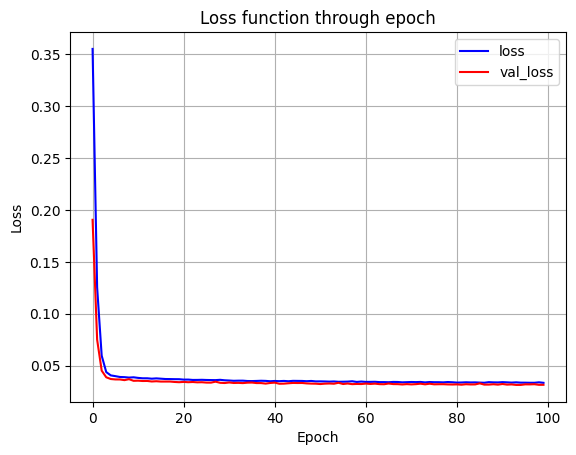

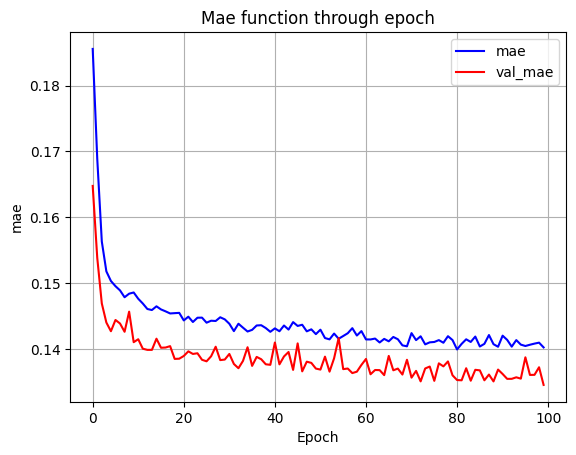

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0322 - mae: 0.1344 
MSE:  0.031450383365154266
MAE: 0.13453161716461182


,Original Test,Prediction Test,Original over Thrashold,Predicted over Thrashold
SongID,,,,
Nice 'N' NaastyThe Salsoul Orchestra,0.883,0.779028,True,True
ShiffteeOnyx,0.253,0.681763,False,False
Since I Made You CryThe Rivieras,0.569,0.606443,False,False
TonightNew Kids On The Block,0.383,0.378168,False,False
Never Comes The DayThe Moody Blues,0.180,0.341842,False,False
...,...,...,...,...
What Am I Living ForChuck Willis,0.682,0.696849,False,False
All Summer LongHit Masters,0.863,0.716378,True,True
Hey Daddy (Daddy's Home)Usher Featuring Plies,0.352,0.482853,False,False


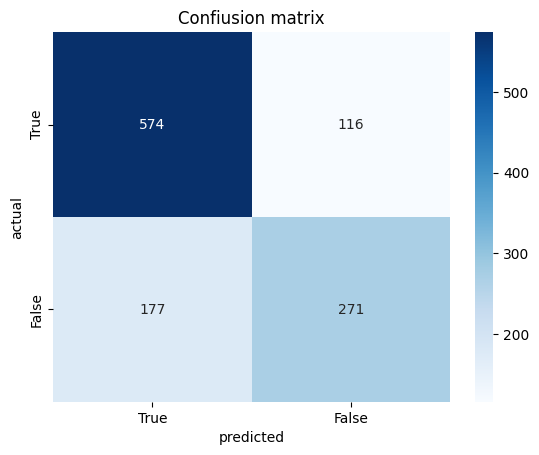

,Value
Accuracy,0.74
Precision,0.70
Recall,0.60
F1-score,0.65


---------------------------------------------------------
USER 1
Epoch 1/100


C:\Users\lovoa\AppData\Local\Temp\ipykernel_9168\2934058548.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numerical_features] = StandardScaler().fit_transform(x[numerical_features])
c:\Users\lovoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4843 - mae: 0.2180 - val_loss: 0.2500 - val_mae: 0.1830
Epoch 2/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2123 - mae: 0.1879 - val_loss: 0.1142 - val_mae: 0.1606
Epoch 3/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1021 - mae: 0.1680 - val_loss: 0.0643 - val_mae: 0.1529
Epoch 4/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0616 - mae: 0.1595 - val_loss: 0.0475 - val_mae: 0.1497
Epoch 5/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0486 - mae: 0.1564 - val_loss: 0.0421 - val_mae: 0.1458
Epoch 6/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0437 - mae: 0.1511 - val_loss: 0.0408 - val_mae: 0.1469
Epoch 7/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0437 - mae: 0.1546 - val_loss: 0.0391 - val_mae: 0.1425
Epoch 8/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0415 - mae: 0.1495 - val_loss: 0.0389 - val_mae: 0.1422
Epoch 9/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss:

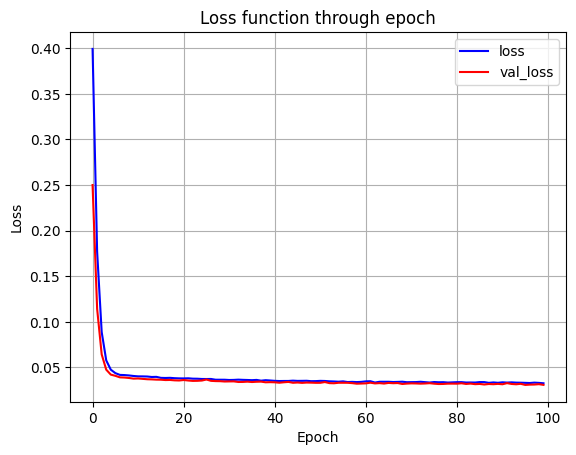

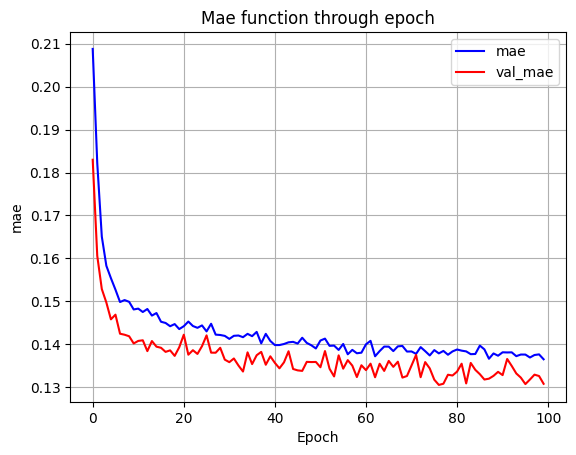

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0299 - mae: 0.1281
MSE:  0.030862780287861824
MAE: 0.13080084323883057


,Original Test,Prediction Test,Original over Thrashold,Predicted over Thrashold
SongID,,,,
One Night AffairThe O'Jays,0.876,0.781480,True,True
Young & Gettin' ItMeek Mill Featuring Kirko Bangz,0.858,0.491441,True,False
Everything Is Good About YouThe Lettermen,0.804,0.749607,True,True
Hot Fun In The SummertimeSly & The Family Stone,0.931,0.844375,True,True
Will The Wolf SurviveLos Lobos,0.844,0.799989,True,True
...,...,...,...,...
HeavenBryan Adams,0.335,0.333754,False,False
I Have NothingWhitney Houston,0.240,0.327034,False,False
Only You Can Love Me This WayKeith Urban,0.325,0.355211,False,False


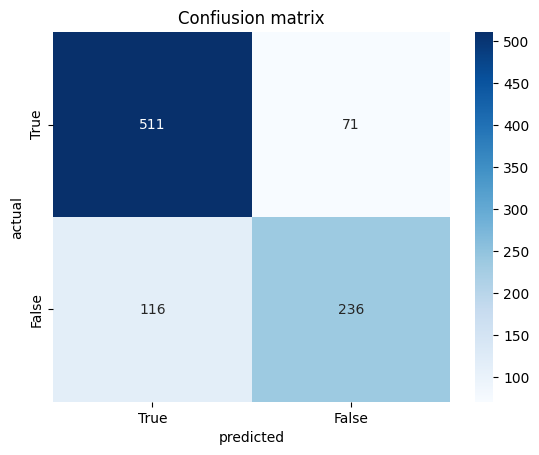

,Value
Accuracy,0.80
Precision,0.77
Recall,0.67
F1-score,0.72


---------------------------------------------------------
USER 2
Epoch 1/100


C:\Users\lovoa\AppData\Local\Temp\ipykernel_9168\2934058548.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numerical_features] = StandardScaler().fit_transform(x[numerical_features])
c:\Users\lovoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3986 - mae: 0.1972 - val_loss: 0.0818 - val_mae: 0.1312
Epoch 2/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0624 - mae: 0.1316 - val_loss: 0.0339 - val_mae: 0.1164
Epoch 3/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0341 - mae: 0.1219 - val_loss: 0.0299 - val_mae: 0.1124
Epoch 4/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0316 - mae: 0.1187 - val_loss: 0.0287 - val_mae: 0.1090
Epoch 5/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0305 - mae: 0.1174 - val_loss: 0.0290 - val_mae: 0.1143
Epoch 6/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0311 - mae: 0.1194 - val_loss: 0.0278 - val_mae: 0.1096
Epoch 7/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0297 - mae: 0.1166 - val_loss: 0.0271 - val_mae: 0.1063
Epoch 8/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0290 - mae: 0.1142 - val_loss: 0.0269 - val_mae: 0.1056
Epoch 9/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss:

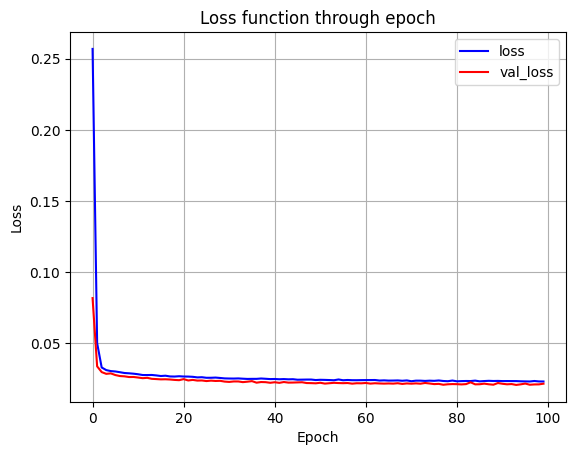

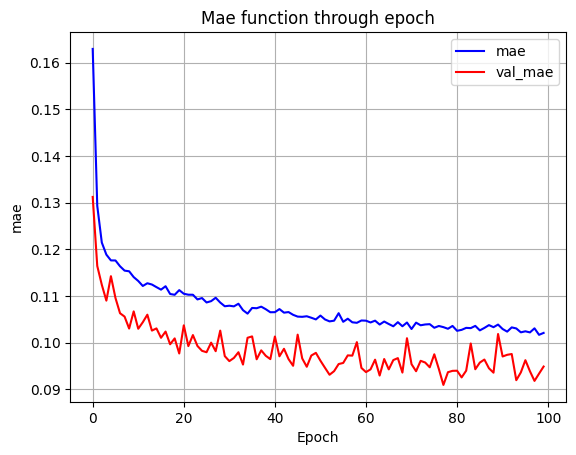

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0219 - mae: 0.0950
MSE:  0.021738490089774132
MAE: 0.0949002355337143


,Original Test,Prediction Test,Original over Thrashold,Predicted over Thrashold
SongID,,,,
The Court RoomClarence Carter,0.690,0.699485,False,False
We Fell In Love While DancingBill Brandon,0.855,0.663803,True,False
Forever My LadyJodeci,0.771,0.665117,True,False
Isn't It Lonely TogetherRobert Knight,0.690,0.699485,False,False
Roll UpWiz Khalifa,0.602,0.485617,False,False
...,...,...,...,...
Shut UpAriana Grande,0.599,0.420718,False,False
Sugar Don't BiteSam Harris,0.975,0.885296,True,True
"Oh, How I Miss You TonightJeanne Black",0.110,0.341775,False,False


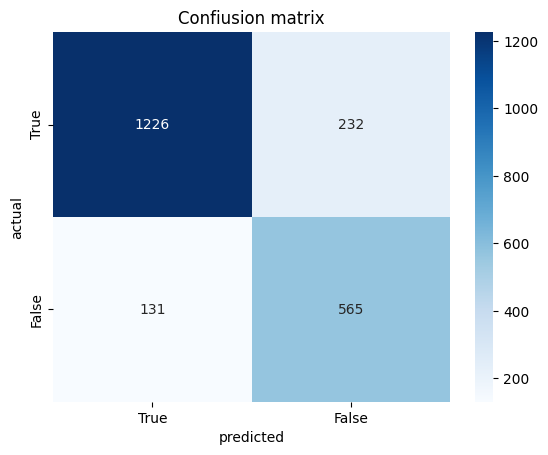

,Value
Accuracy,0.83
Precision,0.71
Recall,0.81
F1-score,0.76


---------------------------------------------------------
USER 3
Epoch 1/100


C:\Users\lovoa\AppData\Local\Temp\ipykernel_9168\2934058548.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numerical_features] = StandardScaler().fit_transform(x[numerical_features])
c:\Users\lovoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4991 - mae: 0.2016 - val_loss: 0.2912 - val_mae: 0.1796
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2510 - mae: 0.1807 - val_loss: 0.1516 - val_mae: 0.1719
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1310 - mae: 0.1670 - val_loss: 0.0857 - val_mae: 0.1613
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0769 - mae: 0.1587 - val_loss: 0.0576 - val_mae: 0.1548
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0550 - mae: 0.1551 - val_loss: 0.0451 - val_mae: 0.1467
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0449 - mae: 0.1487 - val_loss: 0.0408 - val_mae: 0.1463
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0411 - mae: 0.1467 - val_loss: 0.0388 - val_mae: 0.1466
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0400 - mae: 0.1478 - val_loss: 0.0381 - val_mae: 0.1457
Epoch 9/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0396 - mae: 0.1

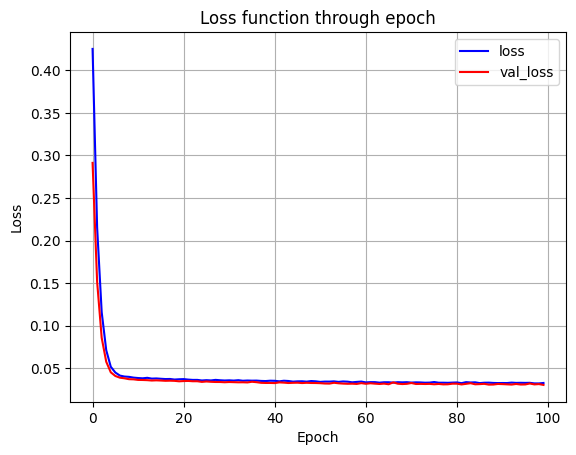

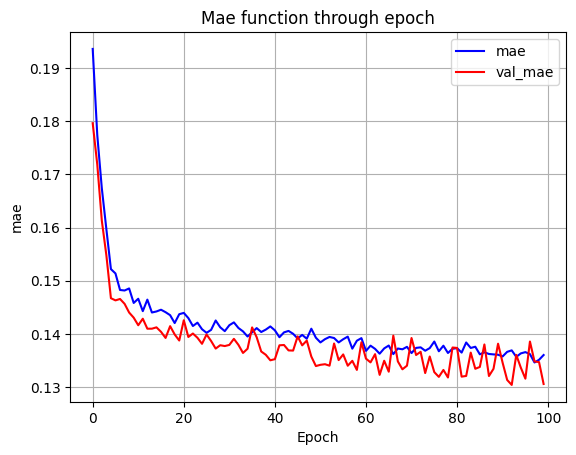

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0323 - mae: 0.1368 
MSE:  0.030352231115102768
MAE: 0.13057544827461243


,Original Test,Prediction Test,Original over Thrashold,Predicted over Thrashold
SongID,,,,
Can't Let You Out Of My SightChuck Jackson & Maxine Brown,0.4530,0.801949,False,True
It's All Coming Back To Me NowCeline Dion,0.2860,0.258080,False,False
Birthday CakeRihanna Featuring Chris Brown,0.3290,0.802792,False,True
Jack The RipperLink Wray And The Wraymen,0.2920,0.521257,False,False
Little StarThe Elegants,0.6970,0.458794,False,False
...,...,...,...,...
Who Needs PicturesBrad Paisley,0.1520,0.386675,False,False
TwoLil Uzi Vert,0.0371,0.326075,False,False
Hands OnKanye West Featuring Fred Hammond,0.5980,0.430198,False,False


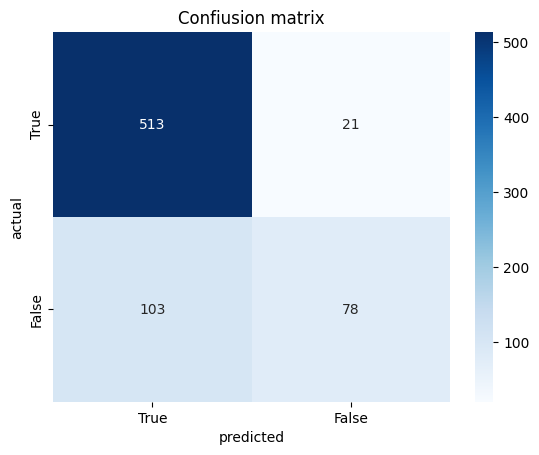

,Value
Accuracy,0.83
Precision,0.79
Recall,0.43
F1-score,0.56


---------------------------------------------------------
USER 4
Epoch 1/100


C:\Users\lovoa\AppData\Local\Temp\ipykernel_9168\2934058548.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numerical_features] = StandardScaler().fit_transform(x[numerical_features])
c:\Users\lovoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5069 - mae: 0.2060 - val_loss: 0.3455 - val_mae: 0.2000
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3068 - mae: 0.1907 - val_loss: 0.2137 - val_mae: 0.1935
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1937 - mae: 0.1899 - val_loss: 0.1370 - val_mae: 0.1873
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1235 - mae: 0.1797 - val_loss: 0.0933 - val_mae: 0.1809
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0867 - mae: 0.1775 - val_loss: 0.0690 - val_mae: 0.1737
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0647 - mae: 0.1672 - val_loss: 0.0561 - val_mae: 0.1686
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0536 - mae: 0.1626 - val_loss: 0.0489 - val_mae: 0.1637
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0491 - mae: 0.1622 - val_loss: 0.0451 - val_mae: 0.1601
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0447 - mae: 0.1

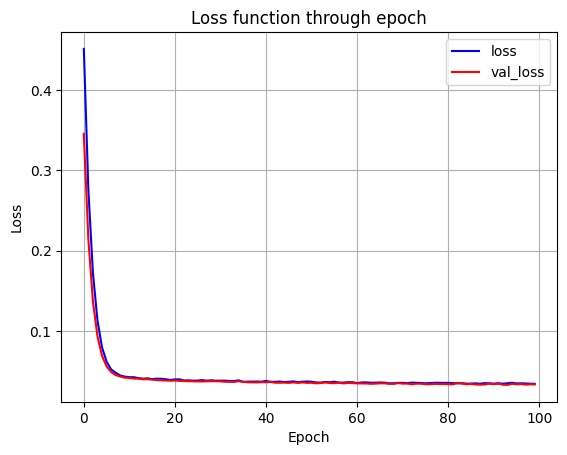

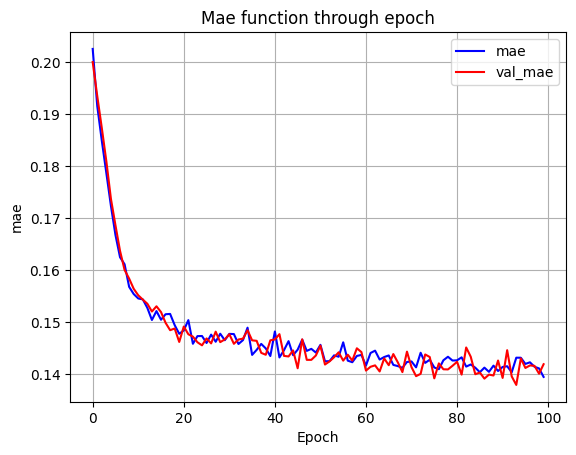

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0348 - mae: 0.1454
MSE:  0.03350035846233368
MAE: 0.14193730056285858


,Original Test,Prediction Test,Original over Thrashold,Predicted over Thrashold
SongID,,,,
DespacitoLuis Fonsi & Daddy Yankee Featuring Justin Bieber,0.816,0.645052,True,False
Wish You Were HereAvril Lavigne,0.340,0.540172,False,False
Wichita LinemanGlen Campbell,0.391,0.343590,False,False
PinkAerosmith,0.777,0.483557,True,False
Go Hard Or Go HomeWiz Khalifa & Iggy Azalea,0.386,0.521663,False,False
...,...,...,...,...
Pull Up N WreckBig Sean & Metro Boomin Featuring 21 Savage,0.091,0.354666,False,False
Empire State Of MindGlee Cast,0.719,0.558966,True,False
Impossible Mission (Mission Impossible)Soul Survivors,0.786,0.660238,True,False


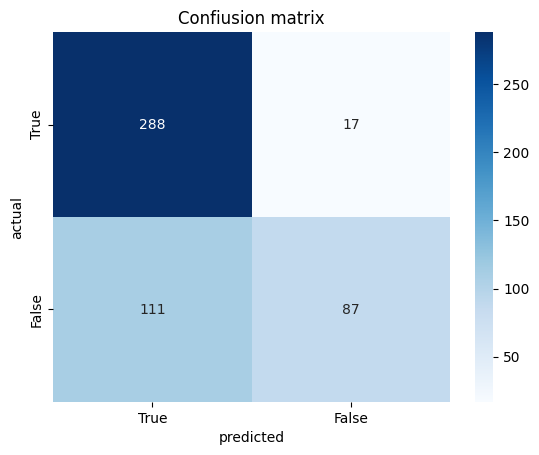

,Value
Accuracy,0.75
Precision,0.84
Recall,0.44
F1-score,0.58


In [29]:
dizio_model_user = {} #in this dizio we store the model for each user
dizio_accuracy = {} #accuracy of the model

reccomandations_songs_per_user={}

#threshold
threshold = 0.7

#loop creation user and model
for i in range(0, len(df_one_hot['User'].unique())): #i indica lo user   

    print('---------------------------------------------------------')
    print(f'USER {i}')

    #select user
    mask_user = df_one_hot['User'] == i
    #display(mask_user)
    user_i_df = df_one_hot[mask_user]
    #display(user_i_df) 

    #return train and test
    x_train,x_test,y_train,y_test = return_train_test(user_i_df)

    #creation model for the specific user
    model_user_i = create_model_user(x_train.shape[1])
    
    #fit the model with the different x, y train (for different user)
    history_model_user_i = fit_model(model_user_i, x_train, y_train, x_test, y_test)

    #prediction
    y_hat = model_user_i.predict(x_test)

    #plot the metrics of the model
    plot_for_model(history_model_user_i)

    #accuracy
    test_loss, test_mae = model_user_i.evaluate(x_test,y_test,verbose=1)
    print('MSE: ', test_loss)
    print('MAE:', test_mae)

    #reccomandation
    reccomandation_df = reco_function_conf_matrix(y_test, y_hat, threshold)

    #save the model in the dictionary
    #add also the raccomandations
    dizio_model_user[f"User{i}"] = {'model_user_i' : model_user_i,
                                    'history_model_user_i': history_model_user_i,
                                    'x_train': x_train,
                                    'x_test': x_test,
                                    'y_train': y_train,
                                    'y_test': y_test,
                                    'y_hat': y_hat,
                                    'recommendations': {
                                        'prediction':reccomandation_df[0],
                                        'metrics':reccomandation_df[1]
                                    }} 
    #save accuracy 
    dizio_accuracy[f'User{i}'] = {
        'MAE' : mean_absolute_error(y_test, y_hat),
        'MSE' : mean_squared_error(y_test, y_hat)
    }

# DISPLAY DICTIONARY ACCURACY

In [30]:
display(dizio_accuracy)

{'User0': {'MAE': 0.1345316241662406, 'MSE': 0.02817132859993107},
 'User1': {'MAE': 0.13080083620109192, 'MSE': 0.026731935328149475},
 'User2': {'MAE': 0.09490025315001371, 'MSE': 0.019000592533351075},
 'User3': {'MAE': 0.13057544570676097, 'MSE': 0.025947034993052606},
 'User4': {'MAE': 0.14193729402274782, 'MSE': 0.029217683955372505}}

A "good" MAE value depends on the context, but in general:  

- **MAE < 0.05** → Excellent model (average error of 5%).  
- **MAE between 0.05 and 0.1** → Good model.  
- **MAE between 0.1 and 0.2** → Acceptable but improvable.  
- **MAE > 0.2** → Low-precision model.  

Our MAE is around **0.1**, it means that, on average, the model is off by **10 percentage points** on the 0-1 rating scale, which might be acceptable in many scenarios.

-----------------------------------------------------------------------------------------------------------------------

***WHY IS THIS MARGIN OF ERROR ACCETABLE ?***

We must consider the nature of the data on which our model is trained.
Since, to determine our users we used an unsupervised algorithm (**kmeans**), with shilhuette 0.49, this means as explained before, that we do not have good homogeneity within the cluster.

So rightly our NN trained on this data will not capture such representative relationships, given that the user himself, as he has been defined, **does not have clear musical tastes**.

**In order to have better results we will have user that lister only particular generes, this allowed us to decrease the errror since we will find a precise patterns in the data.**

## DISPLAY DF METRICS CONFUSION MATRIX

In [31]:
df_metrics_total = pd.concat([dizio_model_user['User0']['recommendations']['metrics'],dizio_model_user['User1']['recommendations']['metrics'],dizio_model_user['User2']['recommendations']['metrics'],dizio_model_user['User3']['recommendations']['metrics'],dizio_model_user['User4']['recommendations']['metrics']], axis=1)
type(df_metrics_total)
#df_metrics_total.columns(colume_name = ['User0','User1','User2','User3','User4'])
df_metrics_total.columns = ['User0','User1','User2','User3','User4']
df_metrics_total

,User0,User1,User2,User3,User4
Accuracy,0.742531,0.799786,0.831476,0.826573,0.745527
Precision,0.700258,0.768730,0.708908,0.787879,0.836538
Recall,0.604911,0.670455,0.811782,0.430939,0.439394
F1-score,0.649102,0.716237,0.756865,0.557143,0.576159


In [32]:
df_metrics_mean = pd.DataFrame(data = df_metrics_total.mean(axis=1), columns=['Mean_Metrics'])
display(df_metrics_mean.round(3))

,Mean_Metrics
Accuracy,0.789
Precision,0.760
Recall,0.591
F1-score,0.651


## CONCLUSION

First of all we want to point out that several attempts have been made to add layers to make the network deeper, we have also tried to increase the number of neurons and modified the drop out neurons and regularization techniques within the neuron itself to avoid overfitting.

Despite these attempts to reduce the MAE below the 10% threshold, this does not appear to be possible.
Our explanation in this regard can be traced back to the nature and quantity of the data.

It would therefore be useful to test our network with different data, in particular **users with homogeneous tastes**, this allowed us to easy find **'evident patterns'**, that will improve our prediction.

__________________________________________________________________________________________________

The recommendation algorithm has shown a general improvement in performance, with an average F1-score of **0.65** compared to the previous 0.64. Notably, **User 2 now has the highest score (0.756)**, while **User 3 remains the lowest (0.557)**, slightly lower than the previous value (0.53).

This **improvement is due to the use of One-Hot Encoding**, which allowed the model to better represent song characteristics and refine recommendations. The effect is particularly visible in User 0 (+0.088), User 1 (+0.03) , User 2 (+0.013), and User 3 and User 4 remained User 3 experienced a slight decrease.

Despite this progress, variability among users is still present, with User 3 continuing to score significantly lower. To further improve performance, more advanced encoding techniques or personalized approaches could be explored, especially for users with less defined musical preferences.

# DISPLAY DICTIONARY MODEL

In [33]:
#display(dizio_model_user)

# SAVE

In [34]:
%store df_one_hot

Stored 'df_one_hot' (DataFrame)
